In [4]:
#you may have to do this to start
!pip install pandas-datareader

In [2]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
tech_comms_df = pd.read_csv('Tech and Comms Sustainability Scores 2.csv', index_col=0)
tech_comms_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021
Name,,,,,,,,
Apple Inc.,AAPL,16.9,Tech,A,A,A,BBB,BBB
Microsoft Corporation,MSFT,14.6,Tech,AAA,AAA,AAA,AAA,AAA
Visa Inc. Class A,V,17.4,Tech,A,A,A,A,A
NVIDIA Corporation,NVDA,13.3,Tech,AA,AAA,AAA,AAA,AAA
Mastercard Incorporated Class A,MA,16.3,Tech,BBB,BBB,A,A,A
...,...,...,...,...,...,...,...,...
T-Mobile US,TMUS,26.7,Communication Services,BB,B,B,BB,BB
Take-Two Interacti,TTWO,17.3,Communication Services,BBB,BBB,BBB,BBB,BBB
Twitter Inc,TWTR,24.9,Communication Services,B,B,BB,BB,BB


In [4]:
#Import list of tickers
tickers_df = pd.read_csv('Tech and Comms Sustainability Scores.csv', index_col=0)

In [5]:
tickers_df

,Ticker,Sustainalytics Score,Sector
Name,,,
Apple Inc.,AAPL,16.9,Tech
Microsoft Corporation,MSFT,14.6,Tech
Visa Inc. Class A,V,17.4,Tech
NVIDIA Corporation,NVDA,13.3,Tech
Mastercard Incorporated Class A,MA,16.3,Tech
...,...,...,...
T-Mobile US,TMUS,26.7,Communication Services
Take-Two Interacti,TTWO,17.3,Communication Services
Twitter Inc,TWTR,24.9,Communication Services


In [14]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [15]:
from tqdm import tqdm_notebook as tqdm
full_df = pd.DataFrame()
for item in tqdm(tickers_list):
    temp_df = web.DataReader(item, data_source='yahoo', start='2019-01-01', end='2021-04-28')
    temp_df.columns = [item + '_' + e for e in temp_df.columns.tolist()]
    full_df = pd.concat([full_df, temp_df], axis=1)

C:\Users\Perry\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/98 [00:00<?, ?it/s]

In [16]:
full_df

,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Close,AAPL_Volume,AAPL_Adj Close,MSFT_High,MSFT_Low,MSFT_Open,MSFT_Close,...,VIAC_Open,VIAC_Close,VIAC_Volume,VIAC_Adj Close,VZ_High,VZ_Low,VZ_Open,VZ_Close,VZ_Volume,VZ_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.439735,101.750000,98.940002,99.550003,101.120003,...,43.619999,45.660000,4704600.0,43.558319,56.160000,55.279999,56.160000,56.020000,13969700.0,50.407848
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.610851,100.190002,97.199997,100.099998,97.400002,...,45.330002,46.130001,5106600.0,44.006687,56.990002,56.060001,56.299999,56.220001,19245400.0,50.587803
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.088364,102.510002,98.930000,99.720001,101.930000,...,46.599998,47.169998,3917700.0,44.998814,56.889999,55.950001,56.490002,56.360001,17035800.0,50.713779
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.008041,103.269997,100.980003,101.639999,102.059998,...,47.130001,47.669998,3413800.0,45.475792,57.259998,56.549999,56.759998,56.720001,16349000.0,51.037716
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.694466,103.970001,101.709999,103.040001,102.800003,...,48.009998,48.369999,3219900.0,46.143574,58.689999,57.049999,57.270000,58.380001,21424600.0,52.531414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-22,134.149994,131.410004,133.039993,131.940002,84566500.0,131.716278,261.779999,255.639999,260.209991,257.170013,...,42.250000,40.730000,60658800.0,40.730000,58.090000,57.139999,57.939999,57.279999,20921900.0,57.279999
2021-04-23,135.119995,132.160004,132.160004,134.320007,78657500.0,134.092239,261.510010,257.269989,257.880005,261.149994,...,40.869999,41.709999,40878500.0,41.709999,57.470001,56.779999,57.130001,57.299999,18099400.0,57.299999
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.491562,262.440002,260.170013,261.660004,261.549988,...,42.439999,41.820000,30501300.0,41.820000,57.389999,56.849998,57.360001,56.939999,15073600.0,56.939999


In [27]:
adj = [e for e in full_df.columns.tolist() if 'Adj' in e]
full_df = full_df.drop(adj, axis=1)

In [41]:
cols_to_keep = [e for e in full_df.columns.tolist() if 'Close' in e]
first = full_df[cols_to_keep].iloc[0,:]
last = full_df[cols_to_keep].iloc[584,:]
return_19_21_df = pd.DataFrame(last/first, columns = ['return']) 
return_19_21_df.index = [e.replace('_Close', '') for e in return_19_21_df.index.tolist()]
return_19_21_df.reset_index(inplace=True)
return_19_21_df

,index,return
0,AAPL,3.383485
1,MSFT,2.517405
2,V,1.756320
3,NVDA,4.485905
4,MA,2.085222
...,...,...
93,TMUS,2.023904
94,TTWO,1.676570
95,TWTR,2.280458
96,VIAC,0.907359


In [47]:
tech_comms_df_final = tech_comms_df.merge(return_19_21_df, left_on='Ticker', right_on='index')
tech_comms_df_final

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index,return
0,AAPL,16.9,Tech,A,A,A,BBB,BBB,AAPL,3.383485
1,MSFT,14.6,Tech,AAA,AAA,AAA,AAA,AAA,MSFT,2.517405
2,V,17.4,Tech,A,A,A,A,A,V,1.756320
3,NVDA,13.3,Tech,AA,AAA,AAA,AAA,AAA,NVDA,4.485905
4,MA,16.3,Tech,BBB,BBB,A,A,A,MA,2.085222
...,...,...,...,...,...,...,...,...,...,...
93,TMUS,26.7,Communication Services,BB,B,B,BB,BB,TMUS,2.023904
94,TTWO,17.3,Communication Services,BBB,BBB,BBB,BBB,BBB,TTWO,1.676570
95,TWTR,24.9,Communication Services,B,B,BB,BB,BB,TWTR,2.280458
96,VIAC,16.1,Communication Services,B,B,B,BB,BBB,VIAC,0.907359


In [50]:
dict  = {'CCC':0, 'B':1, 'BB':2, 'BBB':3, 'A':4, 'AA':5, 'AAA':6}
years = ['MSCI ESG 2017', 'MSCI ESG 2018', 'MSCI ESG 2019', 'MSCI ESG 2020', 'MSCI ESG 2021']
for y in years:
    tech_comms_df_final[y] = tech_comms_df_final[y].map(dict)
tech_comms_df_final

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index,return
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222
...,...,...,...,...,...,...,...,...,...,...
93,TMUS,26.7,Communication Services,2.0,1.0,1.0,2.0,2.0,TMUS,2.023904
94,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570
95,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458
96,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359


<AxesSubplot:xlabel='MSCI ESG 2021', ylabel='return'>

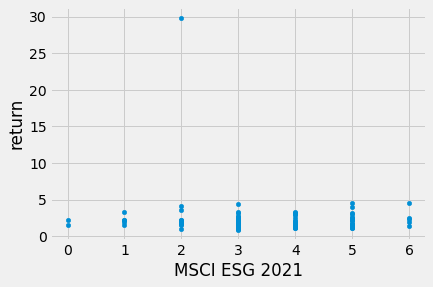

In [51]:
tech_comms_df_final.plot.scatter(x = 'MSCI ESG 2021', y = 'return')

In [52]:
tech_comms_df_final['MSCI ESG 2021'].corr(tech_comms_df_final['return'])

-0.07884412929742096

In [7]:
tickers_list = tickers_df['Ticker'].to_list()
tickers_list

['AAPL',
 'MSFT',
 'V',
 'NVDA',
 'MA',
 'PYPL',
 'INTC',
 'ADBE',
 'CSCO',
 'CRM',
 'AVGO',
 'ACN',
 'TXN',
 'QCOM',
 'ORCL',
 'IBM',
 'AMAT',
 'INTU',
 'NOW',
 'MU',
 'AMD',
 'FIS',
 'LRCX',
 'ADP',
 'FISV',
 'ADSK',
 'GPN',
 'ADI',
 'NXPI',
 'KLAC',
 'TEL',
 'CTSH',
 'HPQ',
 'MCHP',
 'APH',
 'CDNS',
 'SNPS',
 'GLW',
 'ANSS',
 'MSI',
 'PAYX',
 'XLNX',
 'SWKS',
 'FTNT',
 'ZBRA',
 'KEYS',
 'CDW',
 'MXIM',
 'FLT',
 'VRSN',
 'QRVO',
 'WDC',
 'TER',
 'HPE',
 'TRMB',
 'ENPH',
 'PAYC',
 'BR',
 'TYL',
 'AKAM',
 'ANET',
 'CTXS',
 'IT',
 'NTAP',
 'STX',
 'MPWR',
 'PTC',
 'FFIV',
 'NLOK',
 'JKHY',
 'WU',
 'JNPR',
 'DXC',
 'IPGP',
 'FLIR',
 'ATVI',
 'CHTR',
 'CMCSA',
 'DIS',
 'DISCA',
 'DISCK',
 'DISH',
 'EA',
 'FB',
 'FOXA',
 'GOOGL',
 'IPG',
 'LUMN',
 'LYV',
 'NFLX',
 'NWSA',
 'OMC',
 'T',
 'TMUS',
 'TTWO',
 'TWTR',
 'VIAC',
 'VZ']

<AxesSubplot:xlabel='Sustainalytics Score', ylabel='return'>

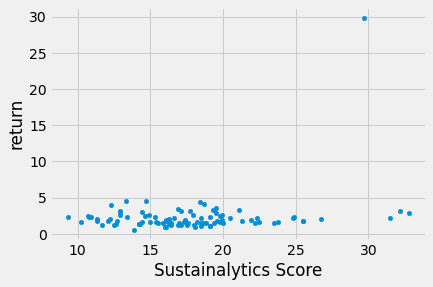

In [48]:
tech_comms_df_final.plot.scatter(x = 'Sustainalytics Score', y = 'return')

In [49]:
tech_comms_df_final['Sustainalytics Score'].corr(tech_comms_df_final['return'])

0.2639210130102744

In [34]:
#get stock pric
fb_df = web.DataReader('FB', data_source='yahoo', start='2019-01-01', end='2021-04-28')
fb_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999
...,...,...,...,...,...,...
2021-04-22,302.920013,296.040009,301.329987,296.519989,16375400,296.519989
2021-04-23,302.589996,297.149994,298.760010,301.130005,17536800,301.130005
2021-04-26,305.799988,301.559998,303.339996,303.040009,16172600,303.040009


In [35]:
fb_df.columns = ['FB High', 'FB Low', 'FB Open', 'FB Close', 'FB Volume', 'FB Adj. Close']

In [36]:
fb_df.head()

,FB High,FB Low,FB Open,FB Close,FB Volume,FB Adj. Close
Date,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999


In [37]:
aapl_df = web.DataReader('AAPL', data_source='yahoo', start='2019-01-01', end='2021-04-28')
aapl_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.505024
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.669640
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.149662
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.069202
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.756794


In [38]:
aapl_df.columns = ['AAPL High', 'AAPL Low', 'AAPL Open', 'AAPL Close', 'AAPL Volume', 'AAPL Adj. Close']
aapl_df

,AAPL High,AAPL Low,AAPL Open,AAPL Close,AAPL Volume,AAPL Adj. Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.505024
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.669640
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.149662
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.069202
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.756794
...,...,...,...,...,...,...
2021-04-22,134.149994,131.410004,133.039993,131.940002,84566500.0,131.940002
2021-04-23,135.119995,132.160004,132.160004,134.320007,78657500.0,134.320007
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.720001


In [39]:
msft_df = web.DataReader('MSFT', data_source='yahoo', start='2019-01-01', end='2021-04-28')
msft_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,101.750000,98.940002,99.550003,101.120003,35329300.0,98.375481
2019-01-03,100.190002,97.199997,100.099998,97.400002,42579100.0,94.756454
2019-01-04,102.510002,98.930000,99.720001,101.930000,44060600.0,99.163513
2019-01-07,103.269997,100.980003,101.639999,102.059998,35656100.0,99.289970
2019-01-08,103.970001,101.709999,103.040001,102.800003,31514400.0,100.009888


In [40]:
msft_df.columns = ['MSFT High', 'MSFT Low', 'MSFT Open', 'MSFT Close', 'MSFT Volume', 'MSFT Adj. Close']
msft_df

,MSFT High,MSFT Low,MSFT Open,MSFT Close,MSFT Volume,MSFT Adj. Close
Date,,,,,,
2019-01-02,101.750000,98.940002,99.550003,101.120003,35329300.0,98.375481
2019-01-03,100.190002,97.199997,100.099998,97.400002,42579100.0,94.756454
2019-01-04,102.510002,98.930000,99.720001,101.930000,44060600.0,99.163513
2019-01-07,103.269997,100.980003,101.639999,102.059998,35656100.0,99.289970
2019-01-08,103.970001,101.709999,103.040001,102.800003,31514400.0,100.009888
...,...,...,...,...,...,...
2021-04-22,261.779999,255.639999,260.209991,257.170013,25606200.0,257.170013
2021-04-23,261.510010,257.269989,257.880005,261.149994,21462600.0,261.149994
2021-04-26,262.440002,260.170013,261.660004,261.549988,19763300.0,261.549988


In [41]:
amzn_df = web.DataReader('AMZN', data_source='yahoo', start='2019-01-01', end='2021-04-28')
amzn_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1553.359985,1460.930054,1465.199951,1539.130005,7983100,1539.130005
2019-01-03,1538.000000,1497.109985,1520.010010,1500.280029,6975600,1500.280029
2019-01-04,1594.000000,1518.310059,1530.000000,1575.390015,9182600,1575.390015
2019-01-07,1634.560059,1589.189941,1602.310059,1629.510010,7993200,1629.510010
2019-01-08,1676.609985,1616.609985,1664.689941,1656.579956,8881400,1656.579956
...,...,...,...,...,...,...
2021-04-22,3372.870117,3301.449951,3371.679932,3309.040039,2580600,3309.040039
2021-04-23,3375.000000,3308.500000,3319.100098,3340.879883,3192800,3340.879883
2021-04-26,3428.449951,3330.939941,3348.000000,3409.000000,4880700,3409.000000


In [42]:
amzn_df.columns = ['AMZN High', 'AMZN Low', 'AMZN Open', 'AMZN Close', 'AMZN Volume', 'AMZN Adj. Close']

In [43]:
goog_df = web.DataReader('GOOG', data_source='yahoo', start='2019-01-01', end='2021-04-28')

In [44]:
goog_df.columns = ['GOOG High', 'GOOG Low', 'GOOG Open', 'GOOG Close', 'GOOG Volume', 'GOOG Adj. Close']
goog_df.head()

,GOOG High,GOOG Low,GOOG Open,GOOG Close,GOOG Volume,GOOG Adj. Close
Date,,,,,,
2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600,1045.849976
2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100,1016.059998
2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900,1070.709961
2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900,1068.390015
2019-01-08,1084.560059,1060.530029,1076.109985,1076.280029,1764900,1076.280029


In [47]:
stock_list = [aapl_df, msft_df, amzn_df, goog_df, fb_df]  
for i in range(4):
    if i==0:
        df = stock_list[i]
    next_df = stock_list[i+1]
    df = pd.merge(df, next_df, left_index=True, right_index=True)
    
top_5_v1_df = df
top_5_v1_df

,AAPL High,AAPL Low,AAPL Open,AAPL Close,AAPL Volume,AAPL Adj. Close,MSFT High,MSFT Low,MSFT Open,MSFT Close,...,GOOG Open,GOOG Close,GOOG Volume,GOOG Adj. Close,FB High,FB Low,FB Open,FB Close,FB Volume,FB Adj. Close
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.505024,101.750000,98.940002,99.550003,101.120003,...,1016.570007,1045.849976,1532600,1045.849976,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.669640,100.190002,97.199997,100.099998,97.400002,...,1041.000000,1016.059998,1841100,1016.059998,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.149662,102.510002,98.930000,99.720001,101.930000,...,1032.589966,1070.709961,2093900,1070.709961,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.069202,103.269997,100.980003,101.639999,102.059998,...,1071.500000,1068.390015,1981900,1068.390015,138.869995,135.910004,137.559998,138.050003,20089300,138.050003
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.756794,103.970001,101.709999,103.040001,102.800003,...,1076.109985,1076.280029,1764900,1076.280029,143.139999,139.539993,139.889999,142.529999,26263800,142.529999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-22,134.149994,131.410004,133.039993,131.940002,84566500.0,131.940002,261.779999,255.639999,260.209991,257.170013,...,2293.229980,2267.919922,1054800,2267.919922,302.920013,296.040009,301.329987,296.519989,16375400,296.519989
2021-04-23,135.119995,132.160004,132.160004,134.320007,78657500.0,134.320007,261.510010,257.269989,257.880005,261.149994,...,2283.469971,2315.300049,1433500,2315.300049,302.589996,297.149994,298.760010,301.130005,17536800,301.130005
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.720001,262.440002,260.170013,261.660004,261.549988,...,2319.929932,2326.739990,1041700,2326.739990,305.799988,301.559998,303.339996,303.040009,16172600,303.040009


In [48]:
# Create the output file (CSV).
output_data_file = "top_5_v1_df.csv"
# Export the City_Data into a CSV.
df.to_csv(output_data_file, index_label="Date")

In [54]:
tickers_list

['AAPL',
 'MSFT',
 'V',
 'NVDA',
 'MA',
 'PYPL',
 'INTC',
 'ADBE',
 'CSCO',
 'CRM',
 'AVGO',
 'ACN',
 'TXN',
 'QCOM',
 'ORCL',
 'IBM',
 'AMAT',
 'INTU',
 'NOW',
 'MU',
 'AMD',
 'FIS',
 'LRCX',
 'ADP',
 'FISV',
 'ADSK',
 'GPN',
 'ADI',
 'NXPI',
 'KLAC',
 'TEL',
 'CTSH',
 'HPQ',
 'MCHP',
 'APH',
 'CDNS',
 'SNPS',
 'GLW',
 'ANSS',
 'MSI',
 'PAYX',
 'XLNX',
 'SWKS',
 'FTNT',
 'ZBRA',
 'KEYS',
 'CDW',
 'MXIM',
 'FLT',
 'VRSN',
 'QRVO',
 'WDC',
 'TER',
 'HPE',
 'TRMB',
 'ENPH',
 'PAYC',
 'BR',
 'TYL',
 'AKAM',
 'ANET',
 'CTXS',
 'IT',
 'NTAP',
 'STX',
 'MPWR',
 'PTC',
 'FFIV',
 'NLOK',
 'JKHY',
 'WU',
 'JNPR',
 'DXC',
 'IPGP',
 'FLIR',
 'ATVI',
 'CHTR',
 'CMCSA',
 'DIS',
 'DISCA',
 'DISCK',
 'DISH',
 'EA',
 'FB',
 'FOXA',
 'GOOGL',
 'IPG',
 'LUMN',
 'LYV',
 'NFLX',
 'NWSA',
 'OMC',
 'T',
 'TMUS',
 'TTWO',
 'TWTR',
 'VIAC',
 'VZ']

In [72]:
from tqdm import tqdm_notebook as tqdm
full_2017_df = pd.DataFrame()
for item in tqdm(tickers_list):
    try:
        temp_df = web.DataReader(item, data_source='yahoo', start='2017-01-01', end='2017-12-31')
        temp_df.columns = [item + '_' + e for e in temp_df.columns.tolist()]
        full_2017_df = pd.concat([full_2017_df, temp_df], axis=1)
    except:
        continue

C:\Users\Perry\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/98 [00:00<?, ?it/s]

In [73]:
full_2017_df

,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Close,AAPL_Volume,AAPL_Adj Close,MSFT_High,MSFT_Low,MSFT_Open,MSFT_Close,...,VIAC_Open,VIAC_Close,VIAC_Volume,VIAC_Adj Close,VZ_High,VZ_Low,VZ_Open,VZ_Close,VZ_Volume,VZ_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.413372,62.840000,62.130001,62.790001,62.580002,...,65.410004,64.389999,3553800,61.426193,54.669998,53.730000,53.959999,54.580002,22891700.0,44.715401
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.382690,62.750000,62.119999,62.480000,62.299999,...,64.660004,65.739998,5365500,62.714054,54.810001,54.330002,54.549999,54.520000,18316100.0,44.666241
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.521944,62.660000,62.029999,62.189999,62.299999,...,65.669998,65.480003,4186500,62.466030,54.830002,54.299999,54.779999,54.639999,13840600.0,44.764545
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.828764,63.150002,62.040001,62.299999,62.840000,...,65.500000,64.290001,5275500,61.330799,53.779999,53.099998,53.669998,53.259998,15615000.0,44.100079
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,28.083660,63.080002,62.540001,62.759998,62.639999,...,64.129997,63.480000,3595700,60.558083,53.270000,52.669998,53.220001,52.680000,14097200.0,43.619827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,43.855000,43.625000,43.669998,43.752499,65397600.0,41.969559,85.629997,84.919998,85.400002,85.510002,...,60.360001,60.169998,2404500,57.400440,53.630001,53.060001,53.110001,53.189999,13657800.0,45.692802
2017-12-26,42.867500,42.419998,42.700001,42.642502,132742000.0,40.904797,85.529999,85.029999,85.309998,85.400002,...,59.869999,60.189999,1647800,57.419514,53.689999,53.130001,53.130001,53.220001,6595800.0,45.718571
2017-12-27,42.695000,42.427502,42.525002,42.650002,85992800.0,40.911991,85.980003,85.220001,85.650002,85.709999,...,60.349998,59.290001,3696300,56.560944,53.500000,53.090000,53.410000,53.279999,8361900.0,45.770115


In [74]:
full_2017_df.columns.tolist() 

['AAPL_High',
 'AAPL_Low',
 'AAPL_Open',
 'AAPL_Close',
 'AAPL_Volume',
 'AAPL_Adj Close',
 'MSFT_High',
 'MSFT_Low',
 'MSFT_Open',
 'MSFT_Close',
 'MSFT_Volume',
 'MSFT_Adj Close',
 'V_High',
 'V_Low',
 'V_Open',
 'V_Close',
 'V_Volume',
 'V_Adj Close',
 'NVDA_High',
 'NVDA_Low',
 'NVDA_Open',
 'NVDA_Close',
 'NVDA_Volume',
 'NVDA_Adj Close',
 'MA_High',
 'MA_Low',
 'MA_Open',
 'MA_Close',
 'MA_Volume',
 'MA_Adj Close',
 'PYPL_High',
 'PYPL_Low',
 'PYPL_Open',
 'PYPL_Close',
 'PYPL_Volume',
 'PYPL_Adj Close',
 'INTC_High',
 'INTC_Low',
 'INTC_Open',
 'INTC_Close',
 'INTC_Volume',
 'INTC_Adj Close',
 'ADBE_High',
 'ADBE_Low',
 'ADBE_Open',
 'ADBE_Close',
 'ADBE_Volume',
 'ADBE_Adj Close',
 'CSCO_High',
 'CSCO_Low',
 'CSCO_Open',
 'CSCO_Close',
 'CSCO_Volume',
 'CSCO_Adj Close',
 'CRM_High',
 'CRM_Low',
 'CRM_Open',
 'CRM_Close',
 'CRM_Volume',
 'CRM_Adj Close',
 'AVGO_High',
 'AVGO_Low',
 'AVGO_Open',
 'AVGO_Close',
 'AVGO_Volume',
 'AVGO_Adj Close',
 'ACN_High',
 'ACN_Low',
 'ACN_Open

In [75]:
cols_to_keep = [e for e in full_2017_df.columns.tolist() if '_Close' in e]
first17 = full_2017_df[cols_to_keep].iloc[0,:]
last17 = full_2017_df[cols_to_keep].iloc[-1,:]
return_2017_df = pd.DataFrame(last17/first17, columns = ['return']) 
return_2017_df.index = [e.replace('_Close', '') for e in return_2017_df.index.tolist()]
return_2017_df.reset_index(inplace=True)
return_2017_df

,index,return
0,AAPL,1.456995
1,MSFT,1.366890
2,V,1.434214
3,NVDA,1.896873
4,MA,1.436189
...,...,...
91,TMUS,1.088992
92,TTWO,2.230394
93,TWTR,1.460462
94,VIAC,0.916291


In [77]:
returns_2017_final_df = tech_comms_df_final.merge(return_2017_df, left_on='Ticker', right_on='index')
returns_2017_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,return_x,index_y,return_y
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189
...,...,...,...,...,...,...,...,...,...,...,...,...
91,TMUS,26.7,Communication Services,2.0,1.0,1.0,2.0,2.0,TMUS,2.023904,TMUS,1.088992
92,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394
93,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458,TWTR,1.460462
94,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291


In [79]:
returns_2017_final_df.rename(columns={"return_x" : "2019-2021 Returns", "return_y": "2017 Returns"}, inplace = True)
returns_2017_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189
...,...,...,...,...,...,...,...,...,...,...,...,...
91,TMUS,26.7,Communication Services,2.0,1.0,1.0,2.0,2.0,TMUS,2.023904,TMUS,1.088992
92,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394
93,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458,TWTR,1.460462
94,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291


In [80]:
from tqdm import tqdm_notebook as tqdm
full_2018_df = pd.DataFrame()
for item in tqdm(tickers_list):
    try:
        temp_df = web.DataReader(item, data_source='yahoo', start='2018-01-01', end='2018-12-31')
        temp_df.columns = [item + '_' + e for e in temp_df.columns.tolist()]
        full_2018_df = pd.concat([full_2018_df, temp_df], axis=1)
    except:
        continue

C:\Users\Perry\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/98 [00:00<?, ?it/s]

In [81]:
full_2018_df

,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Close,AAPL_Volume,AAPL_Adj Close,MSFT_High,MSFT_Low,MSFT_Open,MSFT_Close,...,VIAC_Open,VIAC_Close,VIAC_Volume,VIAC_Adj Close,VZ_High,VZ_Low,VZ_Open,VZ_Close,VZ_Volume,VZ_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.310070,86.309998,85.500000,86.129997,85.949997,...,58.189999,59.169998,3177600,56.446465,53.570000,52.799999,53.160000,53.529999,16045300.0,45.984875
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.302879,86.510002,85.970001,86.059998,86.349998,...,59.200001,59.200001,2966100,56.475086,53.340000,52.180000,53.299999,52.430000,16662400.0,45.039921
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.494736,87.660004,86.570000,86.589996,87.110001,...,59.430000,58.000000,6646500,55.330322,52.889999,51.830002,52.369999,52.599998,12062800.0,45.185963
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,41.967163,88.410004,87.430000,87.660004,88.190002,...,58.259998,57.580002,3169300,54.929653,52.880001,52.349998,52.799999,52.480000,13348900.0,45.082874
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.811283,88.580002,87.599998,88.199997,88.279999,...,57.580002,56.759998,3633100,54.147396,52.750000,52.040001,52.560001,52.389999,16212700.0,45.005558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,37.887501,36.647499,37.037498,36.707500,148676800.0,35.740280,97.970001,93.980003,97.680000,94.129997,...,42.639999,42.020000,1921300,40.085861,55.040001,52.939999,54.680000,53.049999,15077200.0,47.735378
2018-12-26,39.307499,36.680000,37.075001,39.292500,234330000.0,38.257172,100.690002,93.959999,95.139999,100.559998,...,42.240002,43.369999,4512900,41.373722,54.470001,52.400002,53.230000,54.439999,17970500.0,48.986130
2018-12-27,39.192501,37.517502,38.959999,39.037498,212468400.0,38.008892,101.190002,96.400002,99.300003,101.180000,...,42.770000,43.369999,4001900,41.373722,55.169998,53.349998,54.310001,55.150002,17531000.0,49.624996


In [82]:
cols_to_keep = [e for e in full_2018_df.columns.tolist() if '_Close' in e]
first18 = full_2018_df[cols_to_keep].iloc[0,:]
last18 = full_2018_df[cols_to_keep].iloc[-1,:]
return_2018_df = pd.DataFrame(last18/first18, columns = ['return']) 
return_2018_df.index = [e.replace('_Close', '') for e in return_2018_df.index.tolist()]
return_2018_df.reset_index(inplace=True)
return_2018_df

,index,return
0,AAPL,0.915709
1,MSFT,1.181734
2,V,1.152214
3,NVDA,0.669676
4,MA,1.241854
...,...,...
91,TMUS,0.993285
92,TTWO,0.911942
93,TWTR,1.172583
94,VIAC,0.738888


In [83]:
returns_2018_final_df = returns_2017_final_df.merge(return_2018_df, left_on='Ticker', right_on='index')
returns_2018_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index,return
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,TMUS,26.7,Communication Services,2.0,1.0,1.0,2.0,2.0,TMUS,2.023904,TMUS,1.088992,TMUS,0.993285
92,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942
93,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458,TWTR,1.460462,TWTR,1.172583
94,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291,VIAC,0.738888


In [84]:
returns_2018_final_df.rename(columns={"return" : "2018 Returns"}, inplace = True)
returns_2018_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index,2018 Returns
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,TMUS,26.7,Communication Services,2.0,1.0,1.0,2.0,2.0,TMUS,2.023904,TMUS,1.088992,TMUS,0.993285
92,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942
93,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458,TWTR,1.460462,TWTR,1.172583
94,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291,VIAC,0.738888


In [85]:
from tqdm import tqdm_notebook as tqdm
full_2019_df = pd.DataFrame()
for item in tqdm(tickers_list):
    try:
        temp_df = web.DataReader(item, data_source='yahoo', start='2019-01-01', end='2019-12-31')
        temp_df.columns = [item + '_' + e for e in temp_df.columns.tolist()]
        full_2019_df = pd.concat([full_2019_df, temp_df], axis=1)
    except:
        continue

C:\Users\Perry\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/98 [00:00<?, ?it/s]

In [86]:
full_2019_df

,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Close,AAPL_Volume,AAPL_Adj Close,MSFT_High,MSFT_Low,MSFT_Open,MSFT_Close,...,VIAC_Open,VIAC_Close,VIAC_Volume,VIAC_Adj Close,VZ_High,VZ_Low,VZ_Open,VZ_Close,VZ_Volume,VZ_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.439735,101.750000,98.940002,99.550003,101.120003,...,43.619999,45.660000,4704600.0,43.558319,56.160000,55.279999,56.160000,56.020000,13969700.0,50.407848
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.610851,100.190002,97.199997,100.099998,97.400002,...,45.330002,46.130001,5106600.0,44.006687,56.990002,56.060001,56.299999,56.220001,19245400.0,50.587803
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.088364,102.510002,98.930000,99.720001,101.930000,...,46.599998,47.169998,3917700.0,44.998814,56.889999,55.950001,56.490002,56.360001,17035800.0,50.713779
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.008041,103.269997,100.980003,101.639999,102.059998,...,47.130001,47.669998,3413800.0,45.475792,57.259998,56.549999,56.759998,56.720001,16349000.0,51.037716
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.694466,103.970001,101.709999,103.040001,102.800003,...,48.009998,48.369999,3219900.0,46.143574,58.689999,57.049999,57.270000,58.380001,21424600.0,52.531414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.234581,157.710007,157.119995,157.479996,157.380005,...,42.180000,42.020000,2824200.0,40.251926,61.459999,61.020000,61.459999,61.279999,6640100.0,57.473312
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.628067,158.729996,157.399994,157.559998,158.669998,...,42.209999,42.660000,3522000.0,40.864994,61.369999,61.110001,61.279999,61.290001,8117800.0,57.482700
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.600876,159.550003,158.220001,159.449997,158.960007,...,42.549999,41.759998,4175900.0,40.002865,61.619999,61.250000,61.389999,61.529999,8166800.0,57.707787


In [87]:
cols_to_keep = [e for e in full_2019_df.columns.tolist() if '_Close' in e]
first19 = full_2019_df[cols_to_keep].iloc[0,:]
last19 = full_2019_df[cols_to_keep].iloc[-1,:]
return_2019_df = pd.DataFrame(last19/first19, columns = ['return']) 
return_2019_df.index = [e.replace('_Close', '') for e in return_2019_df.index.tolist()]
return_2019_df.reset_index(inplace=True)
return_2019_df

,index,return
0,AAPL,1.859486
1,MSFT,1.559533
2,V,1.413632
3,NVDA,1.727353
4,MA,1.573680
...,...,...
92,TMUS,1.201655
93,TTWO,1.177098
94,TWTR,1.112461
95,VIAC,0.919185


In [88]:
returns_2019_final_df = returns_2018_final_df.merge(return_2019_df, left_on='Ticker', right_on='index')
returns_2019_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index_x,2018 Returns,index_y,return
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709,AAPL,1.859486
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734,MSFT,1.559533
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214,V,1.413632
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676,NVDA,1.727353
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854,MA,1.573680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,TMUS,26.7,Communication Services,2.0,1.0,1.0,2.0,2.0,TMUS,2.023904,TMUS,1.088992,TMUS,0.993285,TMUS,1.201655
92,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942,TTWO,1.177098
93,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458,TWTR,1.460462,TWTR,1.172583,TWTR,1.112461
94,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291,VIAC,0.738888,VIAC,0.919185


In [89]:
returns_2019_final_df.rename(columns={"return" : "2019 Returns"}, inplace = True)
returns_2019_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index_x,2018 Returns,index_y,2019 Returns
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709,AAPL,1.859486
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734,MSFT,1.559533
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214,V,1.413632
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676,NVDA,1.727353
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854,MA,1.573680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,TMUS,26.7,Communication Services,2.0,1.0,1.0,2.0,2.0,TMUS,2.023904,TMUS,1.088992,TMUS,0.993285,TMUS,1.201655
92,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942,TTWO,1.177098
93,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458,TWTR,1.460462,TWTR,1.172583,TWTR,1.112461
94,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291,VIAC,0.738888,VIAC,0.919185


In [90]:
from tqdm import tqdm_notebook as tqdm
full_2020_df = pd.DataFrame()
for item in tqdm(tickers_list):
    try:
        temp_df = web.DataReader(item, data_source='yahoo', start='2020-01-01', end='2020-12-31')
        temp_df.columns = [item + '_' + e for e in temp_df.columns.tolist()]
        full_2020_df = pd.concat([full_2020_df, temp_df], axis=1)
    except:
        continue

C:\Users\Perry\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/98 [00:00<?, ?it/s]

In [91]:
full_2020_df

,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Close,AAPL_Volume,AAPL_Adj Close,MSFT_High,MSFT_Low,MSFT_Open,MSFT_Close,...,VIAC_Open,VIAC_Close,VIAC_Volume,VIAC_Adj Close,VZ_High,VZ_Low,VZ_Open,VZ_Close,VZ_Volume,VZ_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.207466,160.729996,158.330002,158.779999,160.619995,...,42.209999,42.090000,5738100.0,40.318981,61.450001,60.810001,61.380001,61.049999,11447900.0,57.257603
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.486023,159.949997,158.059998,158.320007,158.619995,...,41.730000,41.450001,4640100.0,39.705910,60.790001,60.070000,60.590000,60.400002,13263200.0,56.647980
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.071579,159.100006,156.509995,157.080002,159.029999,...,41.490002,42.060001,5700000.0,40.290241,60.590000,60.080002,60.110001,60.270000,15094500.0,56.526062
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.723213,159.669998,157.320007,159.320007,157.580002,...,41.880001,42.130001,5104000.0,40.357296,60.180000,59.580002,60.099998,59.599998,14293100.0,55.897675
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.909149,160.800003,157.949997,158.929993,160.089996,...,42.200001,41.869999,8139300.0,40.108238,60.099998,59.630001,59.669998,59.709999,15926500.0,56.000843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.549637,223.610001,221.199997,221.419998,222.750000,...,35.740002,35.990002,4720500.0,35.889893,59.070000,58.660000,59.000000,58.840000,7751100.0,57.598083
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.254608,226.029999,223.020004,224.449997,224.960007,...,36.090000,36.730000,6108200.0,36.627831,59.180000,58.650002,59.160000,58.980000,15355600.0,57.735130
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.440399,227.179993,223.580002,226.309998,224.149994,...,36.810001,36.720001,8183000.0,36.617859,59.240002,58.639999,59.029999,58.810001,15686100.0,57.568722


In [92]:
cols_to_keep = [e for e in full_2020_df.columns.tolist() if '_Close' in e]
first20 = full_2020_df[cols_to_keep].iloc[0,:]
last20 = full_2020_df[cols_to_keep].iloc[-1,:]
return_2020_df = pd.DataFrame(last20/first20, columns = ['return']) 
return_2020_df.index = [e.replace('_Close', '') for e in return_2020_df.index.tolist()]
return_2020_df.reset_index(inplace=True)
return_2020_df

,index,return
0,AAPL,1.767138
1,MSFT,1.384759
2,V,1.144464
3,NVDA,2.176650
4,MA,1.176505
...,...,...
93,TMUS,1.715867
94,TTWO,1.702081
95,TWTR,1.676471
96,VIAC,0.885246


In [93]:
returns_2020_final_df = returns_2019_final_df.merge(return_2020_df, left_on='Ticker', right_on='index')
returns_2020_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index_x,2018 Returns,index_y,2019 Returns,index,return
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709,AAPL,1.859486,AAPL,1.767138
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734,MSFT,1.559533,MSFT,1.384759
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214,V,1.413632,V,1.144464
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676,NVDA,1.727353,NVDA,2.176650
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854,MA,1.573680,MA,1.176505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,TMUS,26.7,Communication Services,2.0,1.0,1.0,2.0,2.0,TMUS,2.023904,TMUS,1.088992,TMUS,0.993285,TMUS,1.201655,TMUS,1.715867
92,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942,TTWO,1.177098,TTWO,1.702081
93,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458,TWTR,1.460462,TWTR,1.172583,TWTR,1.112461,TWTR,1.676471
94,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291,VIAC,0.738888,VIAC,0.919185,VIAC,0.885246


In [94]:
returns_2020_final_df.rename(columns={"return" : "2020 Returns"}, inplace = True)
returns_2020_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index_x,2018 Returns,index_y,2019 Returns,index,2020 Returns
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709,AAPL,1.859486,AAPL,1.767138
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734,MSFT,1.559533,MSFT,1.384759
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214,V,1.413632,V,1.144464
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676,NVDA,1.727353,NVDA,2.176650
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854,MA,1.573680,MA,1.176505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,TMUS,26.7,Communication Services,2.0,1.0,1.0,2.0,2.0,TMUS,2.023904,TMUS,1.088992,TMUS,0.993285,TMUS,1.201655,TMUS,1.715867
92,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942,TTWO,1.177098,TTWO,1.702081
93,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458,TWTR,1.460462,TWTR,1.172583,TWTR,1.112461,TWTR,1.676471
94,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291,VIAC,0.738888,VIAC,0.919185,VIAC,0.885246


In [96]:
from tqdm import tqdm_notebook as tqdm
full_2021_df = pd.DataFrame()
for item in tqdm(tickers_list):
    try:
        temp_df = web.DataReader(item, data_source='yahoo', start='2021-01-01', end='2021-04-28')
        temp_df.columns = [item + '_' + e for e in temp_df.columns.tolist()]
        full_2021_df = pd.concat([full_2021_df, temp_df], axis=1)
    except:
        continue

C:\Users\Perry\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/98 [00:00<?, ?it/s]

In [97]:
full_2021_df

,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Close,AAPL_Volume,AAPL_Adj Close,MSFT_High,MSFT_Low,MSFT_Open,MSFT_Close,...,VIAC_Open,VIAC_Close,VIAC_Volume,VIAC_Adj Close,VZ_High,VZ_Low,VZ_Open,VZ_Close,VZ_Volume,VZ_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.997803,223.000000,214.809998,222.529999,217.690002,...,37.299999,36.599998,12491900.0,36.498192,59.150002,58.439999,58.959999,58.849998,19129800.0,57.607876
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.592697,218.520004,215.699997,217.259995,217.899994,...,36.639999,36.990002,13060300.0,36.887108,59.090000,58.459999,58.860001,58.580002,16220000.0,57.343575
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.196747,216.490005,211.940002,212.169998,212.250000,...,37.849998,40.200001,20360700.0,40.088181,59.540001,58.540001,58.810001,59.290001,22678500.0,58.038589
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.502991,219.339996,213.710007,214.039993,218.289993,...,39.990002,40.119999,13123600.0,40.008400,58.759998,58.080002,58.270000,58.529999,19079900.0,57.907497
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,131.629379,220.580002,217.029999,218.679993,219.619995,...,40.009998,40.060001,11159500.0,39.948570,58.360001,57.369999,58.230000,57.799999,28411600.0,57.185261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-22,134.149994,131.410004,133.039993,131.940002,84566500.0,131.716278,261.779999,255.639999,260.209991,257.170013,...,42.250000,40.730000,60658800.0,40.730000,58.090000,57.139999,57.939999,57.279999,20921900.0,57.279999
2021-04-23,135.119995,132.160004,132.160004,134.320007,78657500.0,134.092239,261.510010,257.269989,257.880005,261.149994,...,40.869999,41.709999,40878500.0,41.709999,57.470001,56.779999,57.130001,57.299999,18099400.0,57.299999
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.491562,262.440002,260.170013,261.660004,261.549988,...,42.439999,41.820000,30501300.0,41.820000,57.389999,56.849998,57.360001,56.939999,15073600.0,56.939999


In [99]:
cols_to_keep = [e for e in full_2021_df.columns.tolist() if '_Close' in e]
first21 = full_2021_df[cols_to_keep].iloc[0,:]
last21 = full_2021_df[cols_to_keep].iloc[-1,:]
return_2021_df = pd.DataFrame(last21/first21, columns = ['return']) 
return_2021_df.index = [e.replace('_Close', '') for e in return_2021_df.index.tolist()]
return_2021_df.reset_index(inplace=True)
return_2021_df

,index,return
0,AAPL,1.032223
1,MSFT,1.169369
2,V,1.072052
3,NVDA,1.164964
4,MA,1.125637
...,...,...
93,TMUS,0.997357
94,TTWO,0.863909
95,TWTR,1.204841
96,VIAC,1.131967


In [100]:
returns_2021_final_df = returns_2020_final_df.merge(return_2021_df, left_on='Ticker', right_on='index')
returns_2021_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index_x,2018 Returns,index_y,2019 Returns,index_x,2020 Returns,index_y,return
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709,AAPL,1.859486,AAPL,1.767138,AAPL,1.032223
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734,MSFT,1.559533,MSFT,1.384759,MSFT,1.169369
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214,V,1.413632,V,1.144464,V,1.072052
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676,NVDA,1.727353,NVDA,2.176650,NVDA,1.164964
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854,MA,1.573680,MA,1.176505,MA,1.125637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,TMUS,26.7,Communication Services,2.0,1.0,1.0,2.0,2.0,TMUS,2.023904,TMUS,1.088992,TMUS,0.993285,TMUS,1.201655,TMUS,1.715867,TMUS,0.997357
92,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942,TTWO,1.177098,TTWO,1.702081,TTWO,0.863909
93,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458,TWTR,1.460462,TWTR,1.172583,TWTR,1.112461,TWTR,1.676471,TWTR,1.204841
94,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291,VIAC,0.738888,VIAC,0.919185,VIAC,0.885246,VIAC,1.131967


In [101]:
returns_2021_final_df.rename(columns={"return" : "2021 Returns"}, inplace = True)
returns_2021_final_df

,Ticker,Sustainalytics Score,Sector,MSCI ESG 2017,MSCI ESG 2018,MSCI ESG 2019,MSCI ESG 2020,MSCI ESG 2021,index_x,2019-2021 Returns,index_y,2017 Returns,index_x,2018 Returns,index_y,2019 Returns,index_x,2020 Returns,index_y,2021 Returns
0,AAPL,16.9,Tech,4.0,4.0,4.0,3.0,3.0,AAPL,3.383485,AAPL,1.456995,AAPL,0.915709,AAPL,1.859486,AAPL,1.767138,AAPL,1.032223
1,MSFT,14.6,Tech,6.0,6.0,6.0,6.0,6.0,MSFT,2.517405,MSFT,1.366890,MSFT,1.181734,MSFT,1.559533,MSFT,1.384759,MSFT,1.169369
2,V,17.4,Tech,4.0,4.0,4.0,4.0,4.0,V,1.756320,V,1.434214,V,1.152214,V,1.413632,V,1.144464,V,1.072052
3,NVDA,13.3,Tech,5.0,6.0,6.0,6.0,6.0,NVDA,4.485905,NVDA,1.896873,NVDA,0.669676,NVDA,1.727353,NVDA,2.176650,NVDA,1.164964
4,MA,16.3,Tech,3.0,3.0,4.0,4.0,4.0,MA,2.085222,MA,1.436189,MA,1.241854,MA,1.573680,MA,1.176505,MA,1.125637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,TMUS,26.7,Communication Services,2.0,1.0,1.0,2.0,2.0,TMUS,2.023904,TMUS,1.088992,TMUS,0.993285,TMUS,1.201655,TMUS,1.715867,TMUS,0.997357
92,TTWO,17.3,Communication Services,3.0,3.0,3.0,3.0,3.0,TTWO,1.676570,TTWO,2.230394,TTWO,0.911942,TTWO,1.177098,TTWO,1.702081,TTWO,0.863909
93,TWTR,24.9,Communication Services,1.0,1.0,2.0,2.0,2.0,TWTR,2.280458,TWTR,1.460462,TWTR,1.172583,TWTR,1.112461,TWTR,1.676471,TWTR,1.204841
94,VIAC,16.1,Communication Services,1.0,1.0,1.0,2.0,3.0,VIAC,0.907359,VIAC,0.916291,VIAC,0.738888,VIAC,0.919185,VIAC,0.885246,VIAC,1.131967
